In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
WT__Dpf_3_null_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_small_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

WT__Dpf_3_null_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_total_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
                          on="id",
                          how="inner")

WT__Dpf_3_null.reset_index(inplace=True)

In [4]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__Dpf_3_null["Significant"].value_counts()

small_RNA    1946
No           1024
both          353
total_RNA      87
Name: Significant, dtype: int64

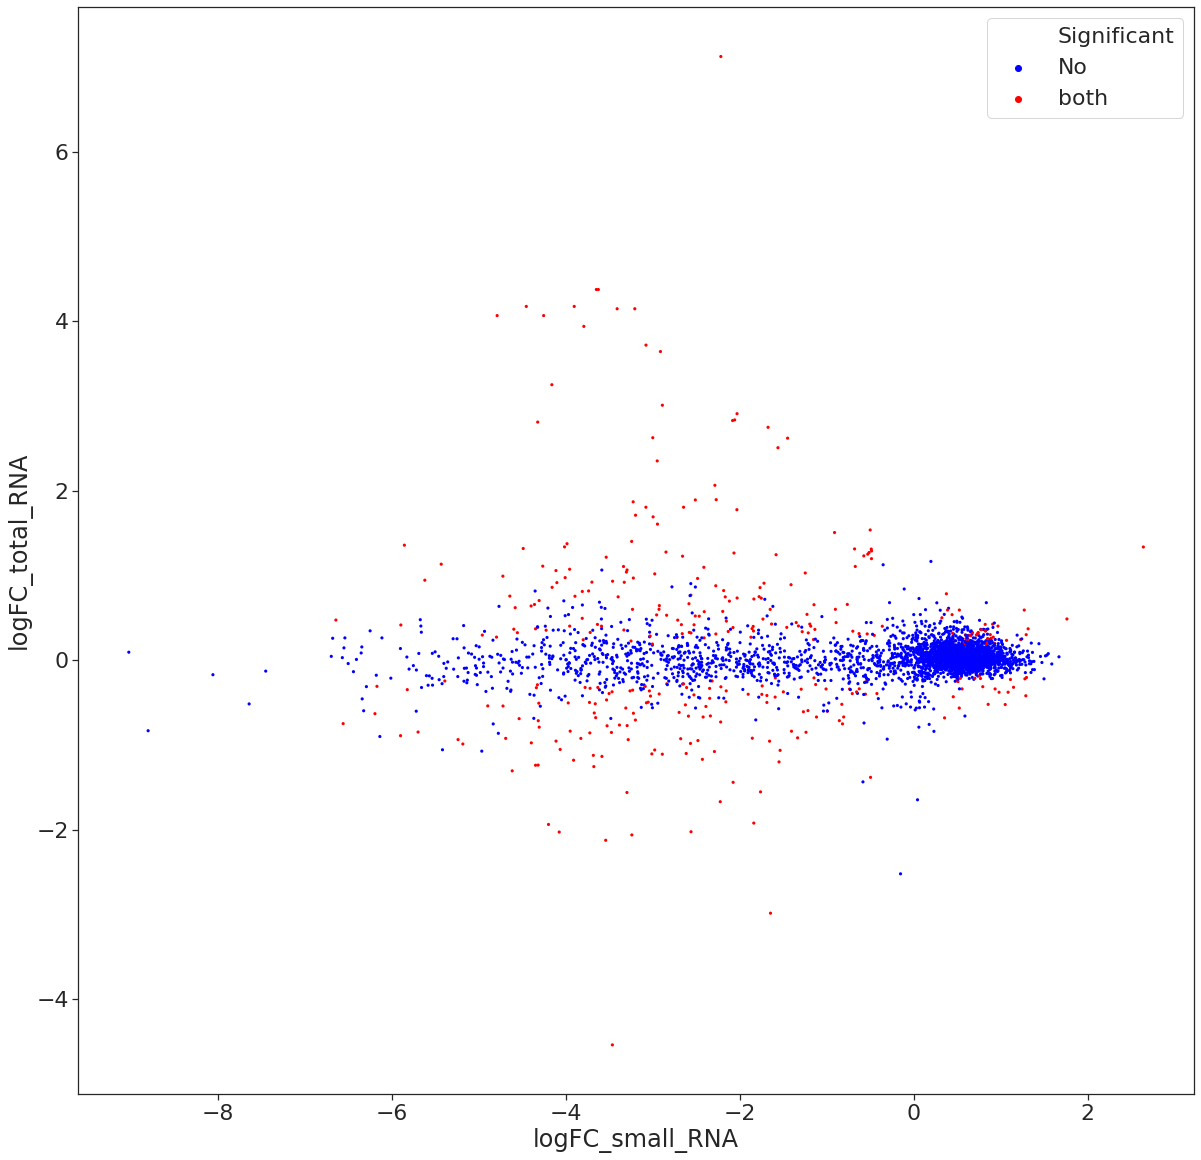

In [5]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__Dpf_3_null["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null.pdf")

In [6]:
WT__Dpf_3_null[WT__Dpf_3_null["Significant"] == "both"].to_csv("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null.tsv", header=True, index=False, sep="\t")

In [7]:
WT__Dpf_3_null[WT__Dpf_3_null["sequence_small_RNA"]=="ZC15.3"][["logFC_small_RNA", "logFC_total_RNA"]]

logFC_small_RNA  logFC_total_RNA
2187        -3.791408          3.93896

In [8]:
WT__Dpf_3_null.fillna("?", inplace=True)

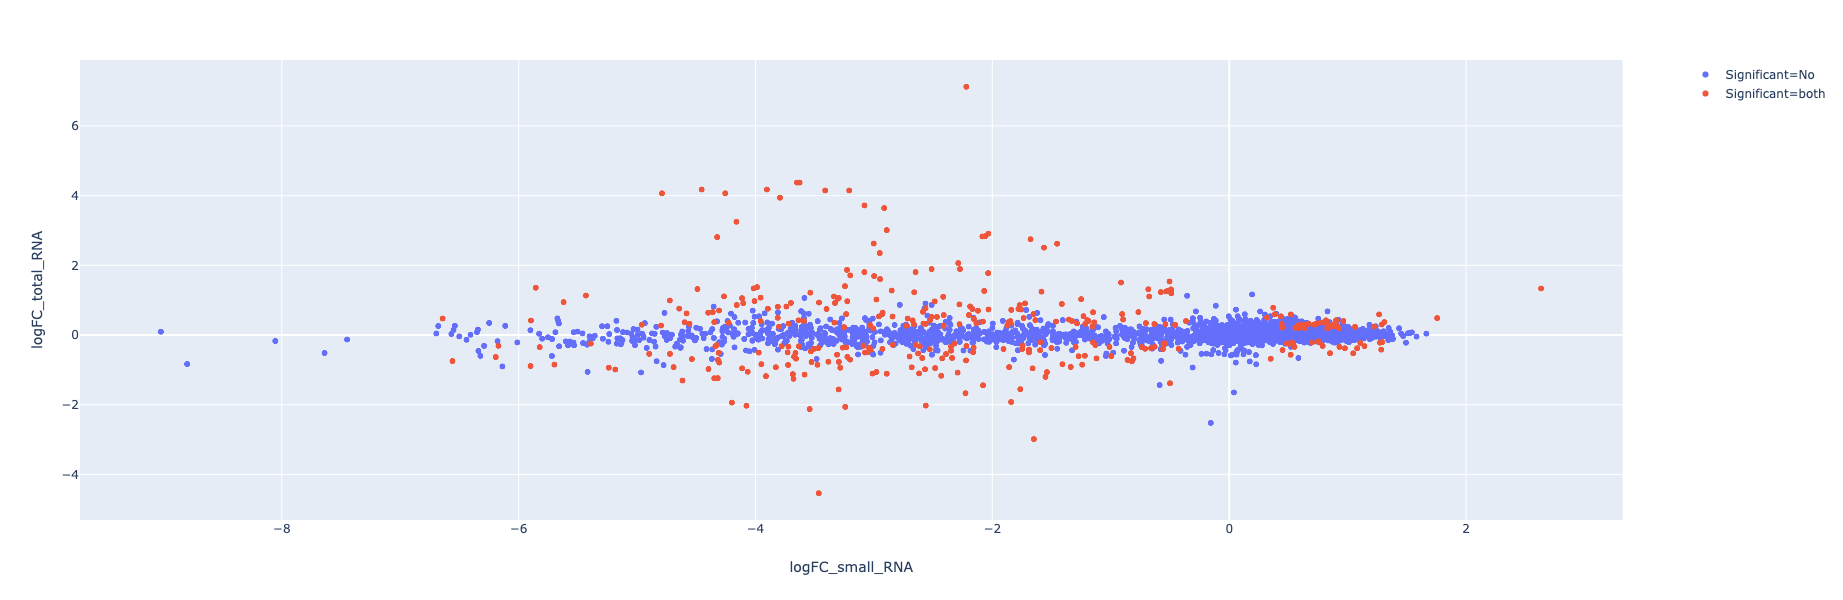

In [9]:
px.scatter(WT__Dpf_3_null,
           x="logFC_small_RNA",
           y="logFC_total_RNA",
           color="Significant",
           hover_data=['gene_name_total_RNA', 
                       'sequence_total_RNA',
                       'gene_biotype_total_RNA', 
                       'repName_total_RNA',
                       'repClass_total_RNA',
                       'repFamily_total_RNA'
                      ])

# Mut-2

In [10]:
WT__mut_2_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_small_RNA.set_index("id", inplace=True)
WT__mut_2_small_RNA.columns = WT__mut_2_small_RNA.columns + "_small_RNA"

WT__mut_2_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_total_RNA.set_index("id", inplace=True)
WT__mut_2_total_RNA.columns = WT__mut_2_total_RNA.columns + "_total_RNA"

WT__mut_2 = pd.merge(WT__mut_2_small_RNA, WT__mut_2_total_RNA, 
                          on="id", 
                          how="inner")

In [11]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[WT__mut_2["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__mut_2.loc[WT__mut_2["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__mut_2["Significant"].value_counts()

both         983
small_RNA    887
total_RNA    533
No           423
Name: Significant, dtype: int64

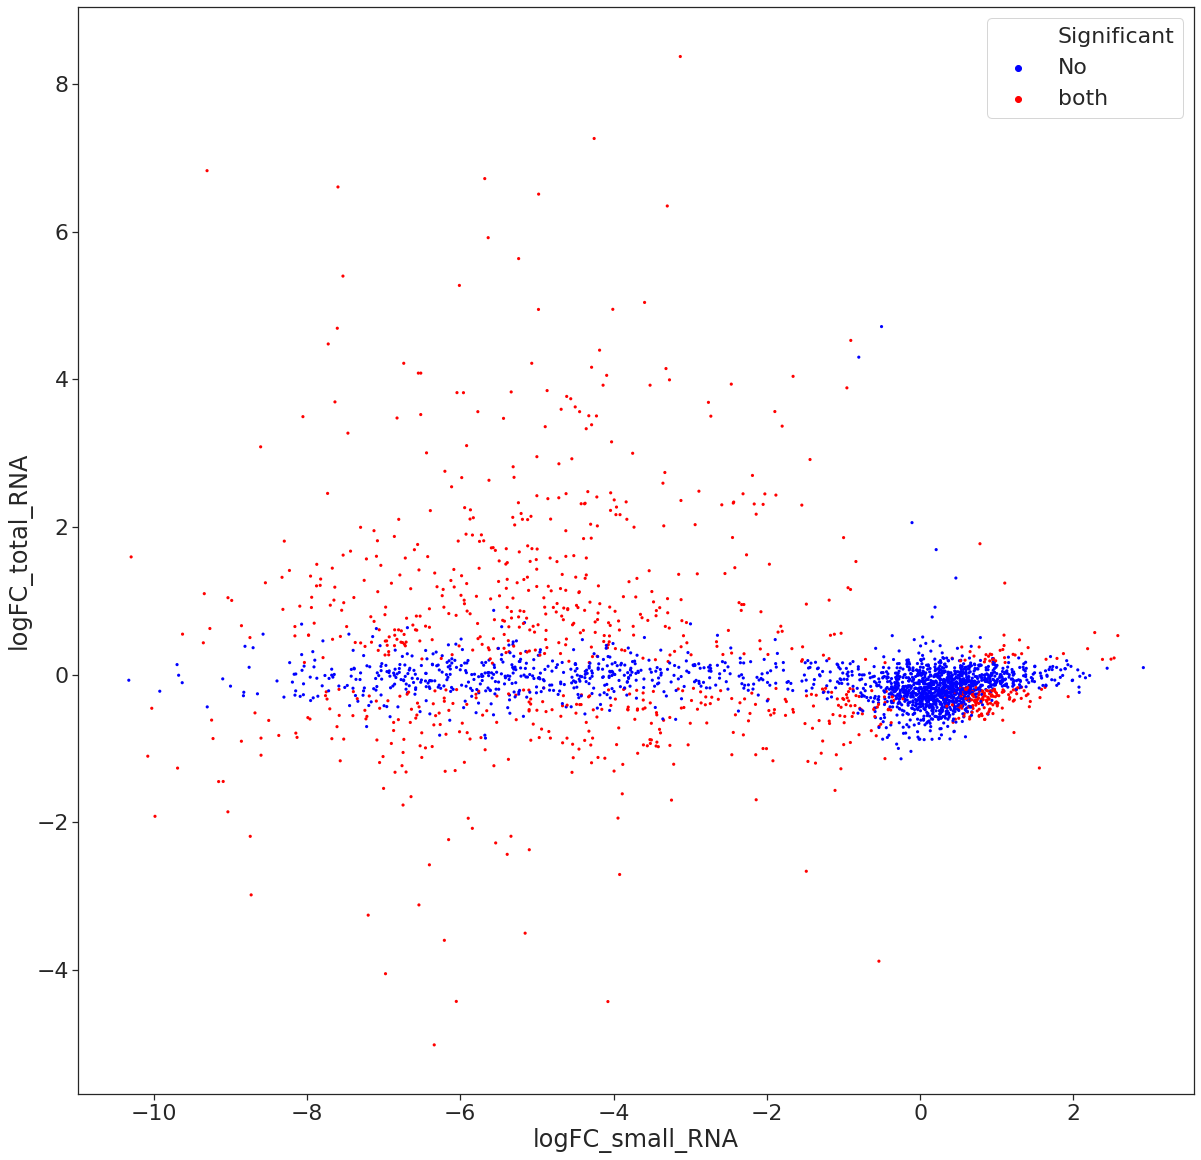

In [12]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__mut_2["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-mut-2.pdf")

In [13]:
WT__mut_2[WT__mut_2["Significant"] == "both"].to_csv("FC_vs_FC_small-RNA_vs_total-RNA-mut-2.tsv", header=True, index=False, sep="\t")

In [14]:
WT__mut_2.fillna("?", inplace=True)

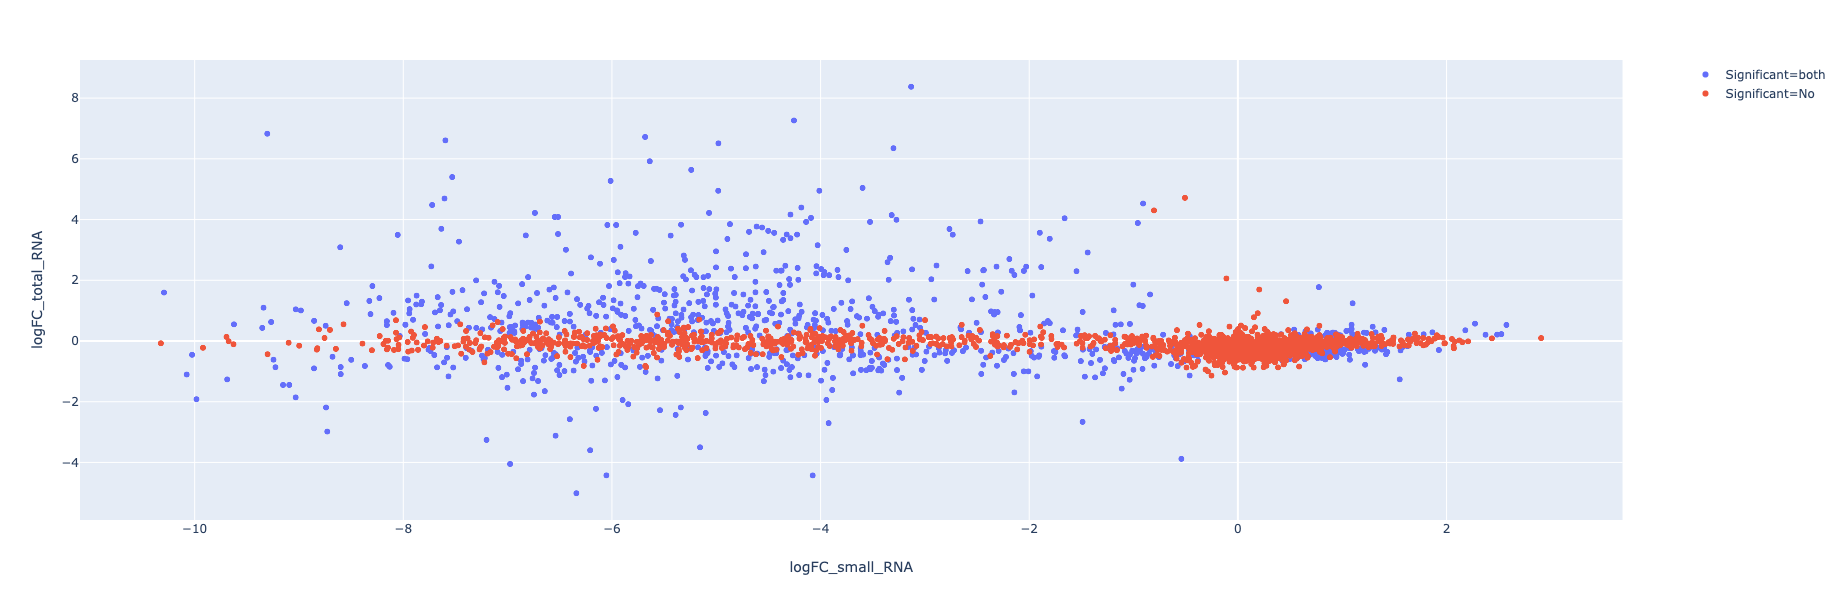

In [15]:
px.scatter(WT__mut_2,
           x="logFC_small_RNA",
           y="logFC_total_RNA",
           color="Significant",
           hover_data=['gene_name_total_RNA', 
                       'sequence_total_RNA',
                       'gene_biotype_total_RNA', 
                       'repName_total_RNA',
                       'repClass_total_RNA',
                       'repFamily_total_RNA'
                      ])

# Repeat analysis but filter CPM on total RNAseq

In [16]:
WT__Dpf_3_null_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_small_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

WT__Dpf_3_null_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_total_RNA = WT__Dpf_3_null_total_RNA[WT__Dpf_3_null_total_RNA["logCPM"]>0]
WT__Dpf_3_null_total_RNA.set_index("id", inplace=True)
WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
                          on="id",
                          how="inner")

WT__Dpf_3_null.reset_index(inplace=True)

In [17]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__Dpf_3_null["Significant"].value_counts()

small_RNA    1764
No           1007
both          282
total_RNA      84
Name: Significant, dtype: int64

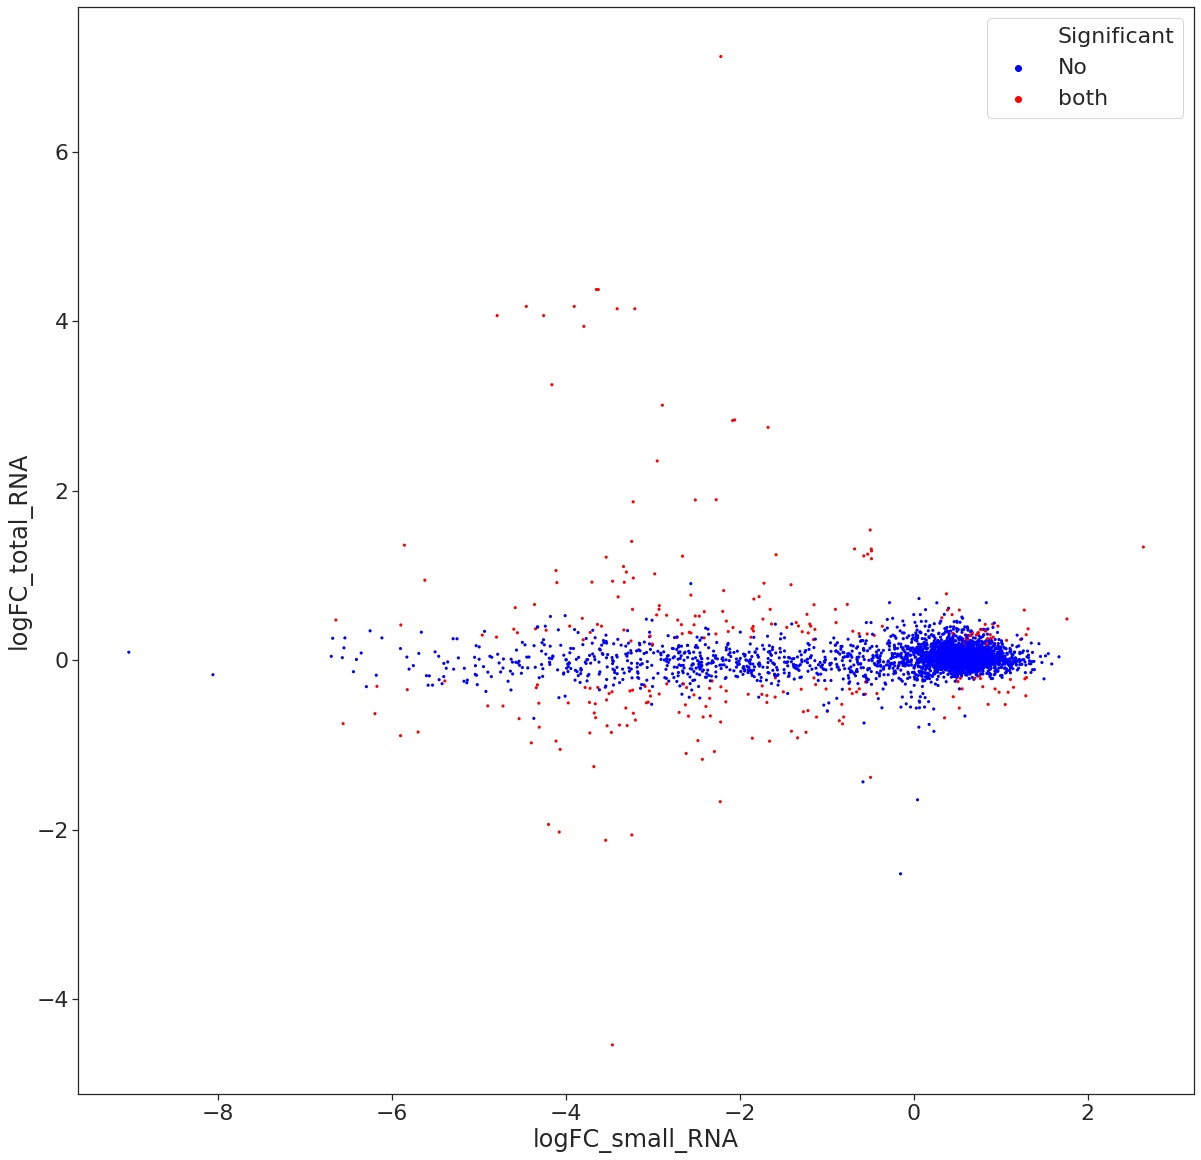

In [18]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__Dpf_3_null["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-Dpf-3_null_FILTER_TOTAL_RNA_CPM.pdf")

In [19]:
WT__mut_2_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_small_RNA.set_index("id", inplace=True)
WT__mut_2_small_RNA.columns = WT__mut_2_small_RNA.columns + "_small_RNA"

WT__mut_2_total_RNA = pd.read_csv("../../02_total_RNAseq_15_C/results/filter/DE_feature_counts_multimappers__WT__mut_2/DE_edgeR/final_table_with_gene_info.tsv",
                                  header=0,
                                  sep="\t")
WT__mut_2_total_RNA = WT__mut_2_total_RNA[WT__mut_2_total_RNA["logCPM"]>0]
WT__mut_2_total_RNA.set_index("id", inplace=True)
WT__mut_2_total_RNA.columns = WT__mut_2_total_RNA.columns + "_total_RNA"

WT__mut_2 = pd.merge(WT__mut_2_small_RNA, WT__mut_2_total_RNA, 
                          on="id", 
                          how="inner")

In [20]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[WT__mut_2["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__mut_2.loc[WT__mut_2["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"

WT__mut_2["Significant"].value_counts()

both         822
small_RNA    780
total_RNA    531
No           422
Name: Significant, dtype: int64

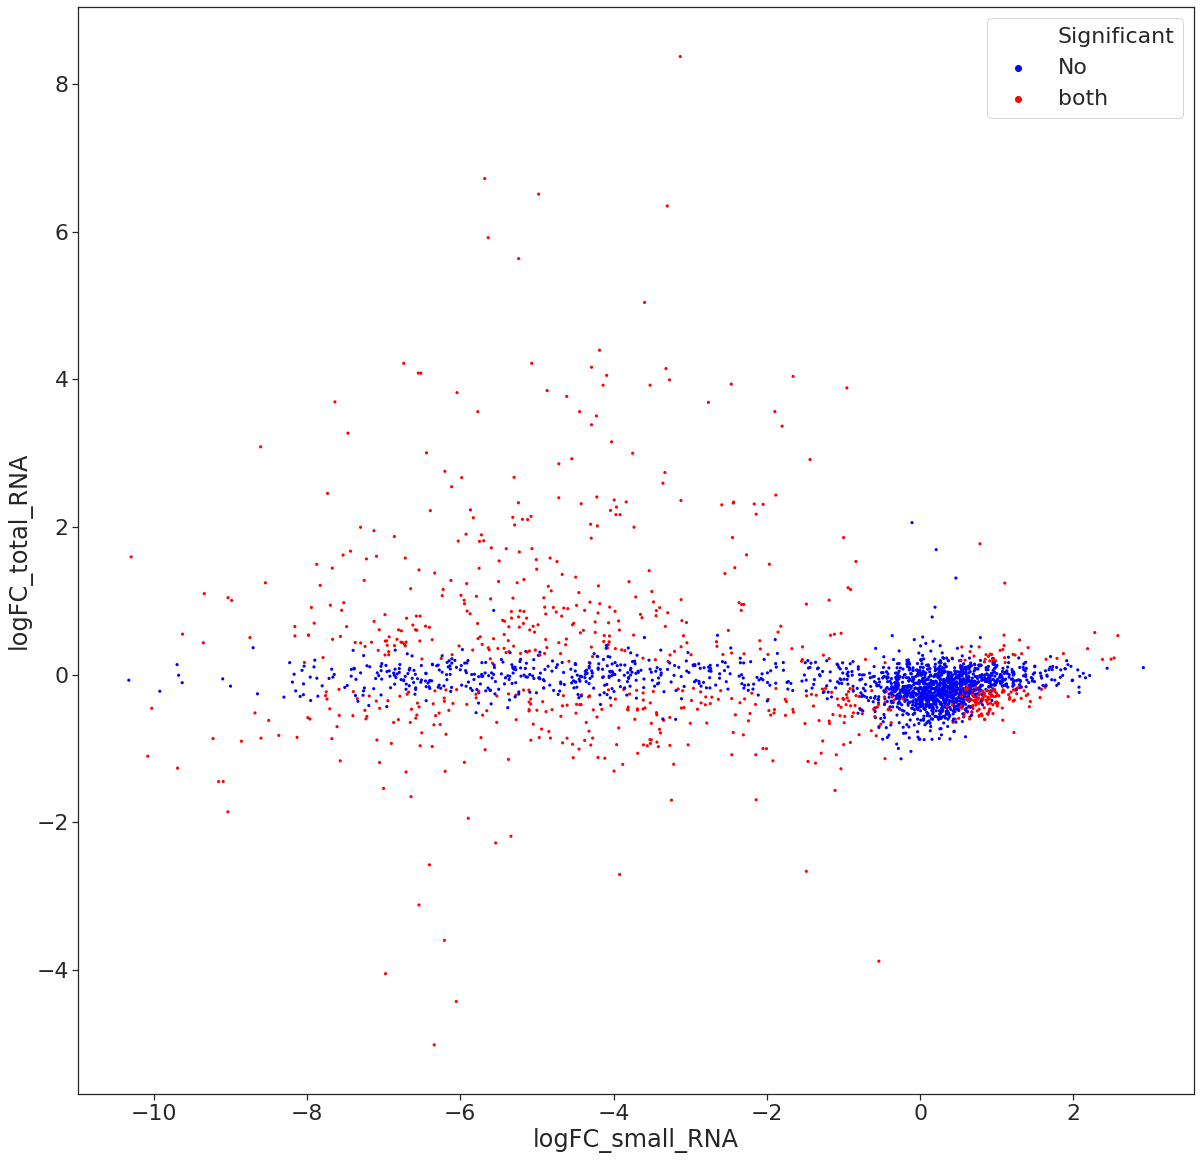

In [21]:
WT__mut_2["Significant"] = "No"
WT__mut_2.loc[((WT__mut_2["FDR_small_RNA"]<0.05) & (WT__mut_2["FDR_total_RNA"]<0.05)), "Significant"] = "both"
WT__mut_2["Significant"].value_counts()

sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__mut_2,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "both"],
                           palette=["blue", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)
plt.savefig("FC_vs_FC_small-RNA_vs_total-RNA-mut-2_FILTER_TOTAL_RNA_CPM.pdf")